In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

DATA_PATH = 'dataset'

def load_csv(path = DATA_PATH):
    csv_path = os.path.join(path, 'drugsComTrain_raw.tsv')
    return pd.read_csv(csv_path,delimiter='\t',encoding='utf-8')

In [2]:
df = load_csv()

In [3]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['condition'] = encode.fit_transform(df['condition'].astype(str))
df['review'] = encode.fit_transform(df['review'].astype(str))
df['date'] = encode.fit_transform(df['date'].astype(str))
df = df.drop(['Unnamed: 0'], axis=1)

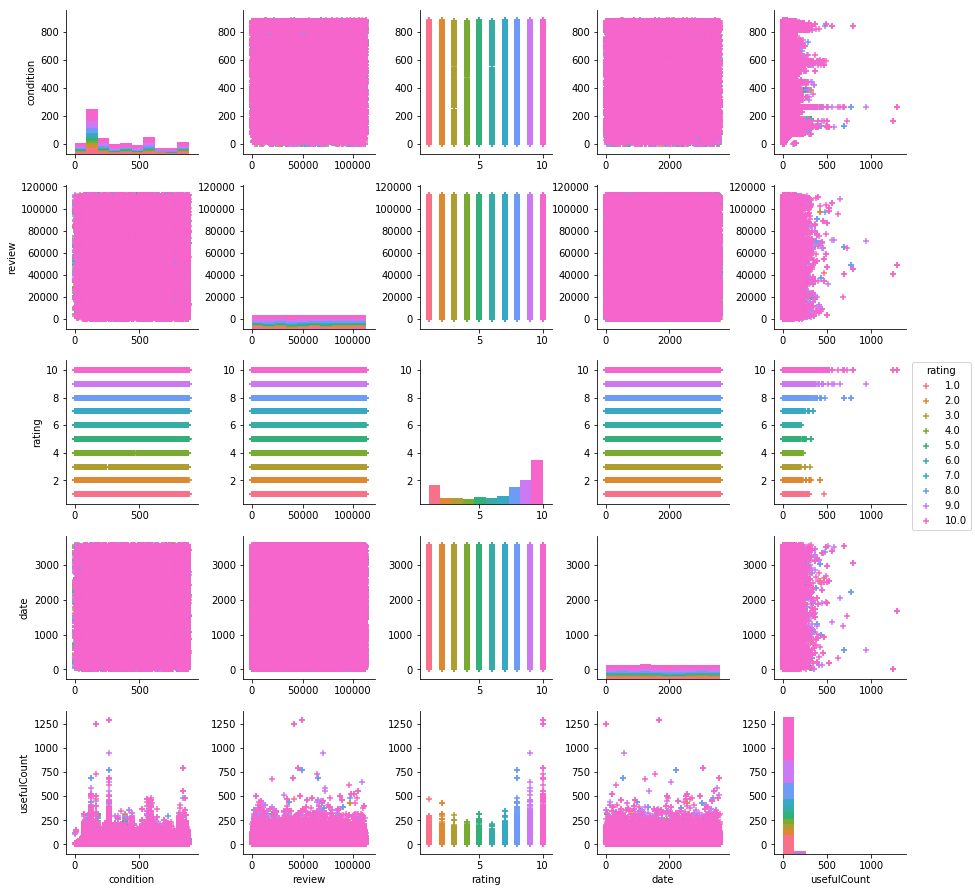

In [5]:
tmp = df.drop('drugName', axis=1)
g = sns.pairplot(tmp, hue='rating', markers='+')
plt.show()

In [7]:
########## Modeling with scikit-learn ####
X = df.drop(['drugName'], axis=1)
y = df['drugName']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   condition  review  rating  date  usefulCount
0        466   77850     9.0  2483           27
1         73   86240     8.0   192          192
2        165   57839     5.0   660           17
3        165   99172     8.0  2896           10
4        574   94329     9.0  2867           37
(161297, 5)
0                   Valsartan
1                  Guanfacine
2                      Lybrel
3                  Ortho Evra
4    Buprenorphine / naloxone
Name: drugName, dtype: object
(161297,)


In [ ]:
# experimenting with different n values

start = time.time()
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

end = time.time()
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

print(end - start)

In [42]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[632, 3, 238, 232,192]])

array(['Phentermine'], dtype=object)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')
clf = MLPClassifier(activation='relu',solver='adam', alpha=1e-5, hidden_layer_sizes=(15,15,15),max_iter=200, random_state=1,verbose=True)
x_train, x_test, y_train, y_test = train_test_split(X_normalized,y, test_size= 0.25, random_state=1)

In [71]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 6.67322853
Iteration 2, loss = 6.47259034
Iteration 3, loss = 6.46629166
Iteration 4, loss = 6.44144986
Iteration 5, loss = 6.38701945
Iteration 6, loss = 6.33074295
Iteration 7, loss = 6.28530689
Iteration 8, loss = 6.24814002
Iteration 9, loss = 6.22071499
Iteration 10, loss = 6.20012876
Iteration 11, loss = 6.18543080
Iteration 12, loss = 6.17447416
Iteration 13, loss = 6.16387164
Iteration 14, loss = 6.15518258
Iteration 15, loss = 6.14735275
Iteration 16, loss = 6.13943981
Iteration 17, loss = 6.13257876
Iteration 18, loss = 6.12417930
Iteration 19, loss = 6.11607287
Iteration 20, loss = 6.10756358
Iteration 21, loss = 6.09957250
Iteration 22, loss = 6.09090044
Iteration 23, loss = 6.08274494
Iteration 24, loss = 6.07478658
Iteration 25, loss = 6.06547077
Iteration 26, loss = 6.05736047
Iteration 27, loss = 6.04703646
Iteration 28, loss = 6.03464544
Iteration 29, loss = 6.02414539
Iteration 30, loss = 6.01404959
Iteration 31, loss = 6.00514424
Iteration 32, los

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.022987650647225116